**overfitting**
- occurs due to complexity of the neural network
-------------------------
**ways to solve overfitting**
- adding more data
    - data agumentation
    - add more rows
- reducing the complexity of the data
    - dropout
    - early stopping
    - regualrization


**regualriazation**
- we add the penalty term in the cost function
- we add $\frac{\lambda}{2n}\sum_{i=1}^k ||w_i||^2$
- this is l2 regularization
- $\lambda$ is a hyperparameter 
- increasing it means we are underfitting
- we donot add the sum of biases as the penalty term
_______________________
**intuition behind regularization**
$$W_n=W_0-\eta \frac{\partial L}{\partial W_0}\\
L^{'}=L+\frac{\lambda}{2}\sum ||W_i||^2\\
\frac{\partial L^{'}}{\partial W_0}=\frac{\partial L}{\partial W_0}+\frac{\lambda }{2}*2*W_0\\
=\frac{\partial L}{\partial W_0}+\lambda W_0\\
W_n=W_0-\eta \lambda W_0-\eta \frac{\partial L}{\partial W_0}\\
=(1-\eta \lambda )W_0-\eta \frac{\partial L}{\partial W_0}
$$
- we are mutliplying the weight with a term containing lambda which will be less then the initial value 
- at each epoch the weight is approaching zero 
- this multiplying factor is called weight decay



In [1]:
import tensorflow
from tensorflow import keras
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

C:\Users\Acer\AppData\Roaming\Python\Python312\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/attr_value.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
C:\Users\Acer\AppData\Roaming\Python\Python312\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/tensor.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
C:\Users\Acer\AppData\Roaming\Python\Python312\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/resource_handle.proto. Please upd

In [2]:
from sklearn.datasets import make_moons

In [3]:
X,y=make_moons(n_samples=100,noise=0.25,random_state=42)

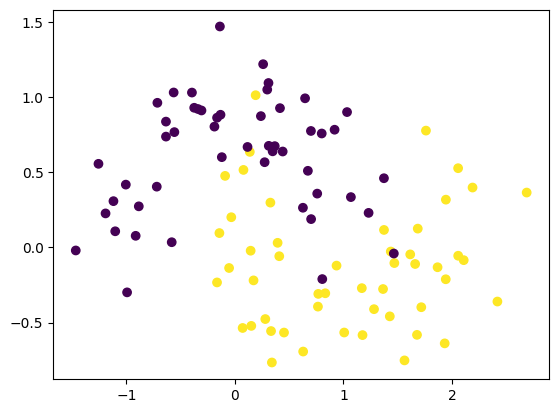

In [4]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1],c=y)
plt.show()

In [5]:
model1=Sequential()
model1.add(Dense(128, activation='relu', input_shape=(2,)))
model1.add(Dense(128, activation='relu'))
model1.add(Dense(1, activation='sigmoid'))
model1.summary()

C:\Users\Acer\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,025 (66.50 KB)

 Trainable params: 17,025 (66.50 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
adam=Adam(learning_rate=0.01)
model1.compile(optimizer=adam,loss='binary_crossentropy',metrics=['accuracy'])
history1=model1.fit(X,y,epochs=200,validation_split=0.2,verbose=0)

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 5s 517us/step


(-2.0, 3.0)

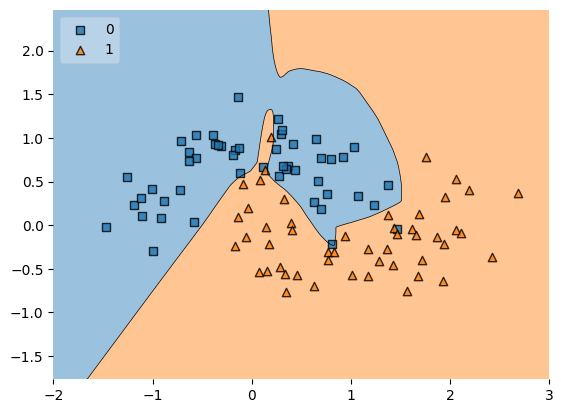

In [7]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype(int),clf=model1,legend=2)
plt.xlim(-2,3)

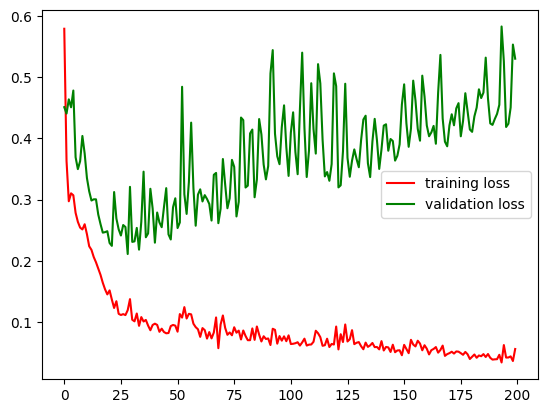

In [8]:
plt.plot(history1.history['loss'],color='red',label='training loss')
plt.plot(history1.history['val_loss'],color='green',label='validation loss')
plt.legend()
plt.show()

Above plot show that the model is overfitting over the epochs.

In [9]:
model2=Sequential()
model2.add(Dense(128, activation='relu', input_shape=(2,),kernel_regularizer=tensorflow.keras.regularizers.l2(0.02)))#value of lambda 0.05
model2.add(Dense(128, activation='relu',kernel_regularizer=tensorflow.keras.regularizers.l2(0.02)))
model2.add(Dense(1, activation='sigmoid'))
model2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,025 (66.50 KB)

 Trainable params: 17,025 (66.50 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
adam=Adam(learning_rate=0.01)
model2.compile(optimizer=adam,loss='binary_crossentropy',metrics=['accuracy'])
history2=model2.fit(X,y,epochs=200,validation_split=0.2,verbose=1)

Epoch 1/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 115ms/step - accuracy: 0.6875 - loss: 2.8882 - val_accuracy: 0.8000 - val_loss: 2.0129
Epoch 2/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.8375 - loss: 1.7138 - val_accuracy: 0.8000 - val_loss: 1.2398
Epoch 3/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.8250 - loss: 1.0221 - val_accuracy: 0.8000 - val_loss: 0.8414
Epoch 4/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.8375 - loss: 0.6952 - val_accuracy: 0.8000 - val_loss: 0.6629
Epoch 5/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.8625 - loss: 0.5863 - val_accuracy: 0.8000 - val_loss: 0.5995
Epoch 6/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.8750 - loss: 0.5047 - val_accuracy: 0.8500 - val_loss: 0.6109
Epoch 7/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.8625 - loss: 0.5175 - val_accuracy: 0.8000 - val_loss: 0.5826
Epoch 8/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.8625 - loss: 0.5060 - val_accuracy: 0.8000 - val_loss

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step


(-2.0, 3.0)

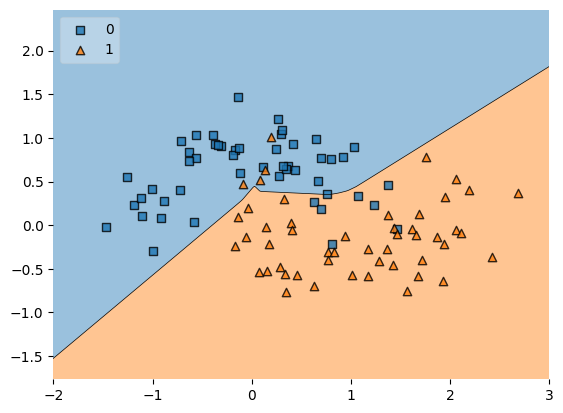

In [11]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype(int),clf=model2,legend=2)
plt.xlim(-2,3)

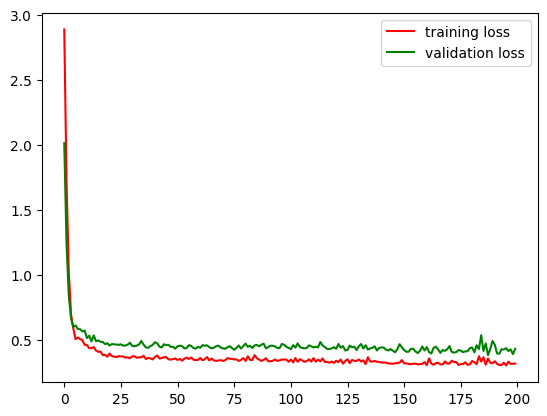

In [12]:
plt.plot(history2.history['loss'],color='red',label='training loss')
plt.plot(history2.history['val_loss'],color='green',label='validation loss')
plt.legend()
plt.show()

C:\Users\Acer\AppData\Local\Temp\ipykernel_4836\1183053240.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([weights1, weights2], labels=['Model1 (No Regularization)', 'Model2 (L2 Regularization)'])


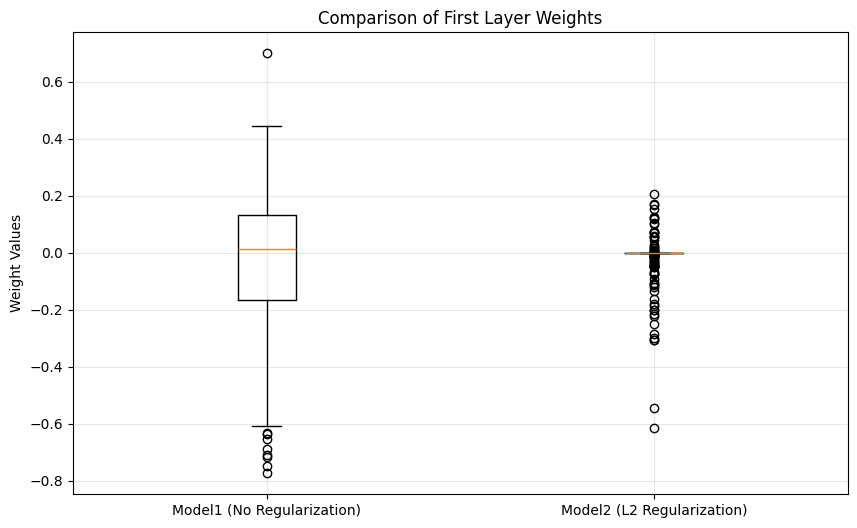

In [13]:
# Box plot comparison of first layer weights
weights1 = model1.layers[0].get_weights()[0].flatten()
weights2 = model2.layers[0].get_weights()[0].flatten()

plt.figure(figsize=(10, 6))
plt.boxplot([weights1, weights2], labels=['Model1 (No Regularization)', 'Model2 (L2 Regularization)'])
plt.ylabel('Weight Values')
plt.title('Comparison of First Layer Weights')
plt.grid(True, alpha=0.3)
plt.show()